In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import t
import math

In [3]:
#leemos los datos meteorologicos
df= pd.read_csv("master.csv",engine="python")

In [5]:
#seleccionamos mexico
dfmexico = df[df["ï»¿country"] == "Mexico"]
#seleccionamos el año del 2015 de mexico
df2015 = dfmexico[dfmexico["year"] == 2015]
#separamos los data frames en machos y hembras
df2015m = df2015[df2015["sex"] == "female"]
df2015h = df2015[df2015["sex"] == "male"]

In [6]:
#x1: suicidios de mujeres en mexico 2015
#x2: suicidios de hombres en mexico 2015
#n1: poblacion de mujeres
#n2: población de hombres
n1 = sum(df2015m["population"])
n2 = sum(df2015h["population"])
x1 = sum(df2015m["suicides_no"])
x2 = sum(df2015h["suicides_no"])
p1 = x1/n1
p2 = x2/n2
#Prubeba de proporciones
#Estadisitoc de pruba
p = (x1 + x2)/(n1 + n2)
#Z calculada
zc = (p1 - p2)/ (p*(1 - p)*(1/n1 + 1/n2))**0.5
#La z alpha = 0.5 es de 1.96
print('el valor de zc calculado es:', zc)


el valor de zc calculado es: -47.88923838764725


In [7]:
import scipy.stats as st
z=st.norm.ppf(.975)

if zc>z or zc<-z:
    print("se rechaza H0")
    
else:
    print("no se rechaza H0")

se rechaza H0


In [8]:
z

1.959963984540054

In [9]:
#Ahora vamos a comparar las proporciones de las generaciones entre hombres y mujeres
#primero para hombres y luego para mujeres
df2015m=df2015m.groupby(['generation']).agg('sum')
df2015h=df2015h.groupby(['generation']).agg('sum')

In [34]:
df2015m

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
generation,,,,,,
Boomers,2015,88,7021916,1.25,0.0,10228
Generation X,2015,303,15940497,1.90,0.0,10228
Generation Z,2015,95,11261292,0.84,0.0,10228
Millenials,4030,751,21433823,6.91,0.0,20456
Silent,2015,11,1915217,0.57,0.0,10228


In [35]:
df2015h

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
generation,,,,,,
Boomers,2015,584,6465941,9.03,0.0,10228
Generation X,2015,1560,15181008,10.28,0.0,10228
Generation Z,2015,137,11790898,1.16,0.0,10228
Millenials,4030,2542,21919638,23.21,0.0,20456
Silent,2015,163,1427654,11.42,0.0,10228


In [10]:
valoresZc=[]

for i in range(0,len(df2015m)):
#x1: suicidios de mujeres en mexico 2015
#x2: suicidios de hombres en mexico 2015
#n1: poblacion de mujeres
#n2: población de hombres
    n1 = df2015m["population"][i]
    n2 = df2015h["population"][i]
    x1 = df2015m["suicides_no"][i]
    x2 = df2015h["suicides_no"][i]
    p1 = x1/n1
    p2 = x2/n2
#Prubeba de proporciones
#Estadisitoc de pruba
    p = (x1 + x2)/(n1 + n2)
#Z calculada
    zc = (p1 - p2)/(p*(1 - p)*(1/n1 + 1/n2))**.5
#La z alpha = 0.5 es de 1.96
#print('el valor de zc calculado es:', zc)
    valoresZc.append(zc)
print(valoresZc)


[-20.21985914880708, -30.185743335571374, -2.4081499793538264, -30.570460719982442, -13.592708503739512]


In [11]:
dfmexicom=dfmexico.loc[dfmexico['sex']=='female']
dfmexicom=dfmexicom.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfmexicom.head()

,suicides/100k pop
year,
1985,0.880000
1986,0.781667
1987,0.843333
1988,0.876667
1989,0.846667


In [12]:
dfmexicoh=dfmexico.loc[dfmexico['sex']=='male']
dfmexicoh=dfmexicoh.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfmexicoh.head()

,suicides/100k pop
year,
1985,5.481667
1986,6.841667
1987,6.061667
1988,6.160000
1989,7.196667


In [13]:
dfmexicom['hombres']=dfmexicoh['suicides/100k pop']
dfmexicom['mu']=dfmexicom['suicides/100k pop']
dfmexicom=dfmexicom.drop('suicides/100k pop',axis=1)
dfmexicom.head()

,indice_h,indice_m
year,,
1985,5.481667,0.880000
1986,6.841667,0.781667
1987,6.061667,0.843333
1988,6.160000,0.876667
1989,7.196667,0.846667


<Figure size 432x288 with 0 Axes>

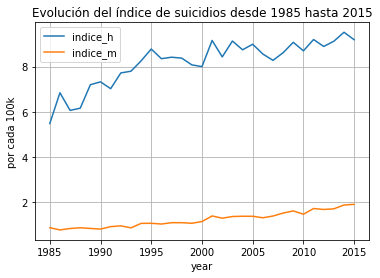

In [14]:
# Gráfica de Temperatura y Humedad Relativa
dfgrafi1 = dfmexicom[['indice_h','indice_m']]
plt.figure(); dfgrafi1.plot(); plt.legend(loc='best')
plt.title("Evolución del índice de suicidios desde 1985 hasta 2015")
plt.ylabel("por cada 100k")
plt.grid(True)
plt.show()

In [15]:
dfmexicom['indice_t']=(dfmexicom['indice_h']+dfmexicom['indice_m'])/2
dfmexicom.head()

,indice_h,indice_m,indice_t
year,,,
1985,5.481667,0.880000,3.180833
1986,6.841667,0.781667,3.811667
1987,6.061667,0.843333,3.452500
1988,6.160000,0.876667,3.518333
1989,7.196667,0.846667,4.021667


<Figure size 432x288 with 0 Axes>

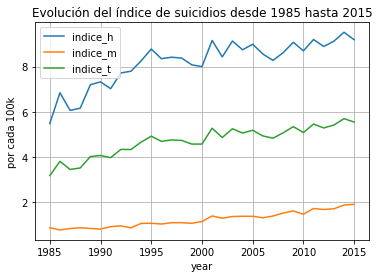

In [16]:
dfgrafi1 = dfmexicom[['indice_h','indice_m','indice_t']]
plt.figure(); dfgrafi1.plot(); plt.legend(loc='best')
plt.title("Evolución del índice de suicidios desde 1985 hasta 2015")
plt.ylabel("por cada 100k")
plt.grid(True)
plt.savefig("mexico_hxm")
plt.show()

In [17]:
dfbrazil=df[df['ï»¿country']=='Brazil']
dfbrazil1=dfbrazil.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfbrazil1['indice_tb']=dfbrazil1['suicides/100k pop']
dfbrazil1=dfbrazil1.drop('suicides/100k pop',axis=1)
dfbrazil1.head()

,indice_tb
year,
1985,4.931667
1986,4.763333
1987,5.843333
1988,5.446667
1989,5.335000


In [18]:
dfeua=df[df['ï»¿country']=='United States']
dfeua1=dfeua.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfeua1['indice_teua']=dfeua1['suicides/100k pop']
dfeua1=dfeua1.drop('suicides/100k pop',axis=1)
dfeua1.head()

,indice_teua
year,
1985,15.393333
1986,15.970833
1987,15.971667
1988,15.642500
1989,15.203333


In [19]:
dfmexicom['indice_tb']=dfbrazil1['indice_tb']
dfmexicom['indice_teua']=dfeua1['indice_teua']
dfmexicom.head()

,indice_h,indice_m,indice_t,indice_tb,indice_teua
year,,,,,
1985,5.481667,0.880000,3.180833,4.931667,15.393333
1986,6.841667,0.781667,3.811667,4.763333,15.970833
1987,6.061667,0.843333,3.452500,5.843333,15.971667
1988,6.160000,0.876667,3.518333,5.446667,15.642500
1989,7.196667,0.846667,4.021667,5.335000,15.203333


<Figure size 432x288 with 0 Axes>

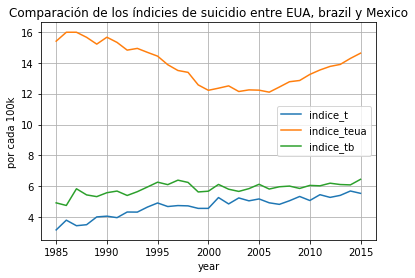

In [20]:
dfgrafi1 = dfmexicom[['indice_t','indice_teua','indice_tb']]
plt.figure(); dfgrafi1.plot(); plt.legend(loc='best')
plt.title("Comparación de los índicies de suicidio entre EUA, brazil y Mexico")
plt.ylabel("por cada 100k")
plt.grid(True)
plt.savefig("indice_paises",plt=2000)
plt.show()

In [21]:
dfmexicoGB=dfmexico[dfmexico['generation']=='Boomers']
dfmexicoGB=dfmexicoGB.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfmexicoGB['Boomers_mex'] =dfmexicoGB['suicides/100k pop']
dfmexicoGB=dfmexicoGB.drop('suicides/100k pop',axis=1)
dfmexicoGB.head()

,Boomers_mex
year,
1985,3.535
1986,3.945
1987,3.935
1988,3.565
1989,3.535


In [22]:
dfbrazilGB=dfbrazil[dfbrazil['generation']=='Boomers']
dfbrazilGB=dfbrazilGB.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfbrazilGB['Boomers_bra'] =dfbrazilGB['suicides/100k pop']
dfbrazilGB=dfbrazilGB.drop('suicides/100k pop',axis=1)
dfbrazilGB.head()

,Boomers_bra
year,
1985,4.920
1986,5.020
1987,5.005
1988,4.795
1989,4.765


In [23]:
dfeuaGB=dfeua[dfeua['generation']=='Boomers']
dfeuaGB=dfeuaGB.groupby(['year']).agg({'suicides/100k pop':'mean'})
dfeuaGB['Boomers_eua'] =dfeuaGB['suicides/100k pop']
dfeuaGB=dfeuaGB.drop('suicides/100k pop',axis=1)
dfeuaGB.head()

,Boomers_eua
year,
1985,15.180
1986,15.690
1987,15.360
1988,15.355
1989,14.965


In [24]:
dfmexicoGB['Boomers_bra']=dfbrazilGB['Boomers_bra']
dfmexicoGB['Boomers_eua']=dfeuaGB['Boomers_eua']
dfmexicoGB.head()

,Boomers_mex,Boomers_bra,Boomers_eua
year,,,
1985,3.535,4.920,15.180
1986,3.945,5.020,15.690
1987,3.935,5.005,15.360
1988,3.565,4.795,15.355
1989,3.535,4.765,14.965


<Figure size 432x288 with 0 Axes>

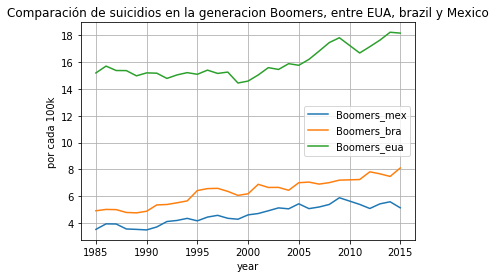

In [25]:
dfgrafi1 = dfmexicoGB[['Boomers_mex','Boomers_bra','Boomers_eua']]
plt.figure(); dfgrafi1.plot(); plt.legend(loc='best')
plt.title("Comparación de suicidios en la generacion Boomers, entre EUA, brazil y Mexico")
plt.ylabel("por cada 100k")
plt.grid(True)
plt.savefig("boomers_paises",plt=2000)
plt.show()

In [26]:
dfmexico1=dfmexico.groupby(['age']).agg({'suicides_no':'sum'})

In [27]:
dfmexico1['num_mex']=dfmexico1['suicides_no']
dfmexico1=dfmexico1.drop('suicides_no',axis = 1)
dfmexico1

,num_mex
age,
15-24 years,33664
25-34 years,27226
35-54 years,29997
5-14 years,3930
55-74 years,12318
75+ years,4004


In [28]:
dfeua1=dfeua.groupby(['age']).agg({'suicides_no':'sum'})

In [29]:
dfeua1['num_eua']=dfeua1['suicides_no']
dfeua1=dfeua1.drop('suicides_no',axis = 1)
dfeua1

,num_eua
age,
15-24 years,141679
25-34 years,182047
35-54 years,380917
5-14 years,8923
55-74 years,224770
75+ years,95677


In [30]:
dfbrazil1=dfbrazil.groupby(['age']).agg({'suicides_no':'sum'})
dfbrazil1['num_bra']=dfbrazil1['suicides_no']
dfbrazil1=dfbrazil1.drop('suicides_no',axis = 1)
dfbrazil1

,num_bra
age,
15-24 years,44597
25-34 years,52534
35-54 years,79860
5-14 years,3029
55-74 years,37556
75+ years,9037


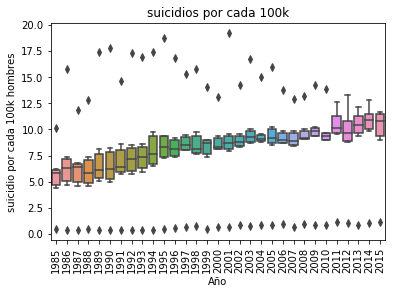

In [32]:
dfmexicohom = dfmexico[dfmexico["sex"]=="male"]
ax = sns.boxplot(x="year", y="suicides/100k pop", data=dfmexicohom)
plt.xticks(rotation=90)
plt.title("suicidios por cada 100k")
plt.ylabel("suicidio por cada 100k hombres")
plt.xlabel("Año")
plt.savefig("boxplot_hom",plt=2000)
plt.show()

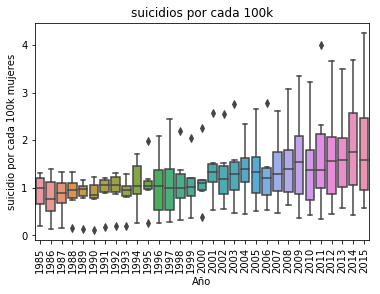

In [33]:
dfmexicomuj = dfmexico[dfmexico["sex"]=="female"]
ax = sns.boxplot(x="year", y="suicides/100k pop", data=dfmexicomuj)
plt.xticks(rotation=90)
plt.title("suicidios por cada 100k")
plt.ylabel("suicidio por cada 100k mujeres")
plt.xlabel("Año")
plt.savefig("boxplot_muj",plt=2000)
plt.show()